<a href="https://colab.research.google.com/github/Buse-cetin/Topic_Modelling/blob/main/LDA_topicModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/My Drive/')

In [ ]:
datafile = '/content/drive/MyDrive/unwanted_clean.csv'

In [ ]:
!pip install pyldavis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=2699ed89b6d644fa864f543ea2f73d375b43102f9fbb1d38f5d379f63abf6854
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=8b86225a86b56218a96b5b9585423aa71ce8b8b3c0dc1be8691236741b8f7849
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyldavis sklearn


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
import numpy as np
#read the csv file 
query_df = pd.read_csv(datafile,error_bad_lines=False)
query_df = query_df.iloc[:8000]#subset of dataframe
query_df['tweet'] = query_df['tweet'].astype(str)
query_df['tweet'].head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


0    dakikadan fazladır taksi dksı görünen otobüsü ...
1    olimpiyat cadde üzeri pendik buraya araç park ...
2    parklarda kontrol bakımları aksatarak canlarla...
3    parklarda kontrol bakımları aksatarak canlarla...
4    bugün bir taksici terörüne tanık oldumtaksici ...
Name: tweet, dtype: object

In [ ]:
import re
import string
from gensim import corpora, models, similarities 

Tweetlerin emojilerden ve sembollerden temizlenmesi

In [ ]:
import re

def deEmoji(text):

  emoji_pattern = re.compile("["
          u"\U0001F600-\U0001F64F"  
          u"\U0001F300-\U0001F5FF"  
          u"\U0001F680-\U0001F6FF"  
          u"\U0001F1E0-\U0001F1FF"  
                            "]+", flags=re.UNICODE)
  return str(emoji_pattern.sub('', text) )

Stopwords

In [ ]:
with open('/content/drive/MyDrive/stopwords-tr (1).txt', 'r') as f:
    myList = [line.strip() for line in f]

Tokenization

In [ ]:
def word_tokenize(sentence):
   
    
    
    acronym_each_dot = r"(?:[a-zğçşöüı]\.){2,}"
    acronym_end_dot = r"\b[a-zğçşöüı]{2,3}\."
    suffixes = r"[a-zğçşöüı]{3,}' ?[a-zğçşöüı]{0,3}"
    numbers = r"\d+[.,:\d]+"
    any_word = r"[a-zğçşöüı]+"
    punctuations = r"[a-zğçşöüı]*[.,!?;:]"
    word_regex = "|".join([acronym_each_dot,
                           acronym_end_dot,
                           suffixes,
                           numbers,
                           any_word,
                           punctuations])
    
    sentence = re.compile("%s"%word_regex, re.I).findall(sentence)
    return sentence

Büyük-küçük harf dönüşümü

In [ ]:
def initial_clean(text):
    
     text = text.translate(str.maketrans('', '', string.punctuation))
     text = text.lower() 
     text = word_tokenize(text)
     return text

Stopwords temizleme

In [ ]:
def remove_stop_words(text):
     stop_words = myList
     return [word for word in text if word not in stop_words]

İstenmeyen kelimelerin çıkartılması

In [ ]:
def unwanted_clean(text):
     unwanted_data= [ "pkk","merhaba","günler","dedi","pelin","nin","imamoğlu","akp","chp","terör","izmir","iki","ibb","ibbsikayet",'istanbul','gtgtb','imamoğlu','istanbulbld','beyazmasa','belediye','imamoglu','ekrem',"istanbulsikayet",'istanbul_trafik',"istanbultrafik","ibb_ulasim","iett","beyazmasa","ibbulaştırma","ibbbeyazmasa","istanbul","nin","belediye","blk","den","soylu","belediye"] 
     query_df = pd.DataFrame(query_df, columns = ["tweet"])
     unwanted= query_df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in unwanted_data))
     return text

Yukarıdaki tüm fonksiyonları tek bir işleve toplar

In [ ]:
def apply_all(text):
    
     return remove_stop_words(initial_clean(deEmoji(text)))

Token İşlemi

In [ ]:
import time   
t1 = time.time()   
query_df['tokenized_texts'] = query_df['tweet'].apply(apply_all) 
t2 = time.time()  
print("Time to clean and tokenize", len(query_df), "texts:", (t2-t1)/60, "min") 

Time to clean and tokenize 8000 texts: 0.0764677087465922 min


In [ ]:
query_df.head(6)

,Unnamed: 0,tweet,tokenized_texts
0,0,dakikadan fazladır taksi dksı görünen otobüsü ...,"[dakikadan, fazladır, taksi, dksı, görünen, ot..."
1,1,olimpiyat cadde üzeri pendik buraya araç park ...,"[olimpiyat, cadde, üzeri, pendik, buraya, araç..."
2,2,parklarda kontrol bakımları aksatarak canlarla...,"[parklarda, kontrol, bakımları, aksatarak, can..."
3,3,parklarda kontrol bakımları aksatarak canlarla...,"[parklarda, kontrol, bakımları, aksatarak, can..."
4,4,bugün bir taksici terörüne tanık oldumtaksici ...,"[bugün, taksici, terörüne, tanık, oldumtaksici..."
5,5,akşam otobüse binemedikkendinizle gurur duyun ...,"[akşam, otobüse, binemedikkendinizle, gurur, d..."


LDA

In [ ]:
#LDA
!pip install pyLDAvis
import gensim
import pyLDAvis.gensim_models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


In [ ]:

tokenized = query_df['tokenized_texts']
dictionary = corpora.Dictionary(tokenized)
#1'den az tweette olanları ve sorguların %80'inden fazlasında oluşan terimleri filtreleme.
dictionary.filter_extremes(no_below=1, no_above=0.8)
#Oluşturulan sözlüğü bir değişkene atama
corpus = [dictionary.doc2bow(tokens) for tokens in tokenized]
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 3), (12, 1), (13, 1)]]


In [ ]:
[[(dictionary[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('bekliyoruz', 1),
  ('dakikadan', 1),
  ('dksı', 1),
  ('fazladır', 1),
  ('gerçekten', 1),
  ('görünen', 1),
  ('ibbşikayet', 1),
  ('istanbulun', 1),
  ('otobüsü', 1),
  ('reddetti', 1),
  ('sıkıntısından', 1),
  ('taksi', 3),
  ('ulaşım', 1),
  ('yıldım', 1)]]

In [ ]:
#LDA
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 8, id2word=dictionary, passes=100)
ldamodel.save('mOdel.gensim')
topics = ldamodel.print_topics(num_words=10000)#Topiclerde bulunacak kelimeler

Görüntülenen çıkış son 5000 satıra kısaltıldı.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * l

In [ ]:
for topic in topics:
   print(topic)

(0, '0.009*"indirim" + 0.006*"nin" + 0.006*"merhaba" + 0.005*"yalan" + 0.005*"teşekkürler" + 0.004*"ulaşım" + 0.004*"istanbul" + 0.004*"ye" + 0.004*"dileriz" + 0.004*"günler" + 0.003*"ekrem" + 0.003*"maltepe" + 0.003*"payından" + 0.003*"istanbula" + 0.003*"değildir" + 0.003*"kurum" + 0.003*"size" + 0.003*"ongun" + 0.003*"desteği" + 0.002*"icisleri" + 0.002*"indirimi" + 0.002*"doğalgaz" + 0.002*"istanbulda" + 0.002*"imamoğlu" + 0.002*"yetki" + 0.002*"birimlere" + 0.002*"talebinizi" + 0.002*"yi" + 0.002*"ileteceğiz" + 0.002*"belediye" + 0.002*"alanımızda" + 0.002*"yapıldı" + 0.002*"zaman" + 0.002*"konu" + 0.002*"e" + 0.002*"özel" + 0.002*"süleyman" + 0.002*"ülkeyi" + 0.002*"devam" + 0.002*"bi" + 0.002*"teşekkür" + 0.002*"aynı" + 0.002*"i" + 0.002*"yazık" + 0.002*"millet" + 0.002*"doğal" + 0.002*"oy" + 0.001*"dağdan" + 0.001*"blk" + 0.001*"dağ" + 0.001*"bütçesinden" + 0.001*"goksu" + 0.001*"yazik" + 0.001*"adama" + 0.001*"hemen" + 0.001*"sayın" + 0.001*"üzerinden" + 0.001*"istifa" + 0.001

In [ ]:
get_document_topics = ldamodel.get_document_topics(corpus[0])
print(get_document_topics)

[(6, 0.94849944)]


Topicleri Görselleştirme

In [ ]:
lda_viz = gensim.models.ldamodel.LdaModel.load('mOdel.gensim')#lda modeli yükleniyor
lda_display = pyLDAvis.gensim_models.prepare(lda_viz, corpus, dictionary, sort_topics=True)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas

In [ ]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [ ]:
coherence_model_lda = CoherenceModel(model=ldamodel, texts=query_df['tokenized_texts'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)
coherence_ldas=coherence_model_lda.get_coherence_per_topic()

Coherence Score:  0.2781516426179967


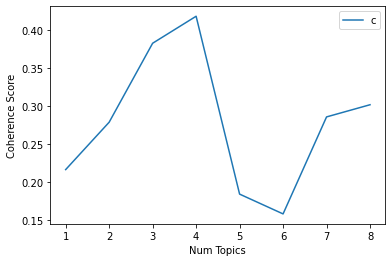

In [ ]:
topicsname=[]
for i in range(1,8+1):
  topicsname.append("{0}".format(i))
topicsname

plt.plot(topicsname,coherence_ldas)
plt.xlabel("Num Topics")
plt.ylabel("Coherence Score")
plt.legend(("coherence_values"),loc='best')
plt.show()


In [ ]:
def dominant_topic(ldamodel,corpus,content):
     #Her sorguda baskın konuyu bulma işlevi
     sent_topics_df = pd.DataFrame() 
     # Her sorguda ana konuyu alın
     for i, row in enumerate(ldamodel[corpus]):
         row = sorted(row, key=lambda x: (x[1]), reverse=True)
         # Her sorgu için Baskın konuyu, Perc Katkısını ve Anahtar Kelimeleri alın
         for j, (topic_num, prop_topic) in enumerate(row):
             if j == 0:  
                 wp = ldamodel.show_topic(topic_num,topn=30)
                 topic_keywords = ", ".join([word for word, prop in wp])
                 sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
             else:
                 break
     sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
     contents = pd.Series(content)#kirli veri
     sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
     return(sent_topics_df)
df_dominant_topic = dominant_topic(ldamodel=ldamodel, corpus=corpus, content=query_df['tweet']) 
df_dominant_topic.head(10)

,Dominant_Topic,Perc_Contribution,Topic_Keywords,tweet
0,1.0,0.5594,"ekrem, igdaş, ye, işe, sayın, nin, yalan, terö...",dakikadan fazladır taksi dksı görünen otobüsü ...
1,5.0,0.3547,"ye, istanbul, başkan, bak, indirim, nin, yalan...",olimpiyat cadde üzeri pendik buraya araç park ...
2,2.0,0.9028,"istanbul, veteriner, şehit, güzel, metro, saat...",parklarda kontrol bakımları aksatarak canlarla...
3,2.0,0.9028,"istanbul, veteriner, şehit, güzel, metro, saat...",parklarda kontrol bakımları aksatarak canlarla...
4,4.0,0.9676,"zam, indirim, toplu, nin, istanbul, tl, ulaşım...",bugün bir taksici terörüne tanık oldumtaksici ...
5,1.0,0.6215,"ekrem, igdaş, ye, işe, sayın, nin, yalan, terö...",akşam otobüse binemedikkendinizle gurur duyun ...
6,0.0,0.8766,"zam, mazot, tl, istanbul, nin, lira, ulaşım, o...",insan olmadigini belirten kisinin esgali zinci...
7,2.0,0.9270,"istanbul, veteriner, şehit, güzel, metro, saat...",gecenin ikisinde evimin önünden geçen tramvay ...
8,4.0,0.9602,"zam, indirim, toplu, nin, istanbul, tl, ulaşım...",scooter sorununa çare bulacak sol duran cihazı...
9,5.0,0.9539,"ye, istanbul, başkan, bak, indirim, nin, yalan...",konut yakininda insaatlara izin veren kararlar...


In [ ]:
df_dominant_topic.to_csv('outputFile.csv')